We want to get familiar with our data, let's explore it.

In [1]:
import pandas as pd
import numpy as np
df = pd.read_pickle('waferImg26x26.pkl')
images = df.images.values
labels = df.labels.values
labels = np.asarray([str(l[0]) for l in labels])

print(df.head())
print(df['labels'].value_counts())

                                              images  labels
0  [[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...  [none]
1  [[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...  [none]
2  [[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...  [none]
3  [[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...  [none]
4  [[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...  [none]
[none]         13489
[Loc]            297
[Edge-Loc]       296
[Center]          90
[Random]          74
[Scratch]         72
[Edge-Ring]       31
[Near-full]       16
[Donut]            1
Name: labels, dtype: int64


The label part is pretty clear, most wafers don't have any "default", it corresponds to the label 'none'.
The other defaults are listed, they should correspond to where the default is located.

Let's try to visualize an image. First, how is the image represented ?

In [2]:
print(df['images'][0])

[[[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


The image is composed of 3 arrays, they correspond to each color (RGB representation).
Each array must be of size 26x26 but let's check it out.

In [8]:
print(df['images'][0][0].size)
print(df['images'][0][1].size)
print(df['images'][0][2].size)
print(26*26)

676
676
676
676


We indeed have 3 arrays of 26 by 26, representing each RGB color.

Now let's visualize one image with matplotlib. We just have to transpose data to make it compatible with plt.imshow.

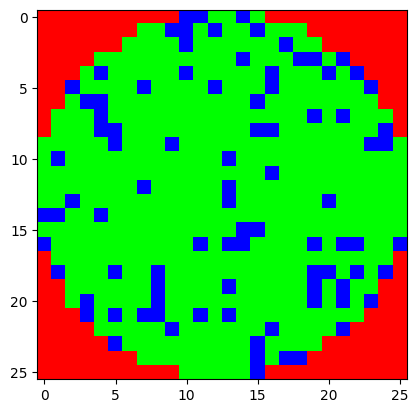

In [9]:
import matplotlib.pyplot as plt
first_image_data = df.iloc[0]['images']

transposed_image_data = np.transpose(first_image_data, (1, 2, 0))      #transpose to make it compatible with plt.imshow

plt.imshow(transposed_image_data)
plt.show()

It corresponds to what we must find, the image of the pdf is the first image of the dataset. Let's explore the different label categories :

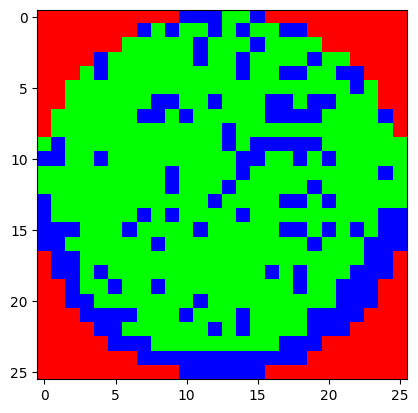

In [10]:
# find image of a specific label among :
# [none]         13489
# [Loc]            297
# [Edge-Loc]       296
# [Center]          90
# [Random]          74
# [Scratch]         72
# [Edge-Ring]       31
# [Near-full]       16
# [Donut]            1
wanted_label = 'Edge-Ring'
loc_images_df = df[df['labels'] == wanted_label]

if not loc_images_df.empty:
    loc_image_data = loc_images_df.iloc[0]['images']
    # print(loc_image_data[0],type(loc_image_data[0]))
    # print("\n",loc_image_data[1],type(loc_image_data[1]))
    # print("\n",loc_image_data[2],type(loc_image_data[2]))

    plt.imshow(np.transpose(loc_image_data, (1, 2, 0)))
    plt.show()

The labels are pretty explicit, "Donut" returns a donut shape on the wafer, "Edge-Ring" returns a semi circle on the edge of the wafer...

In [18]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

images = np.array([np.transpose(img, (1, 2, 0)) for img in images])

# we have to encode labels to transform them into vectors, then to turn them into categorical labels
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)

categorical_encoded_labels = to_categorical(integer_encoded)    # labels are represented by vectors with 0s and a single 1

num_classes = categorical_encoded_labels.shape[1]    # how many labels there are

# we choose to use 10% of the data to test the accuracy, and 90% to train
x_train, x_test, y_train, y_test = train_test_split(images, categorical_encoded_labels, test_size=0.1, random_state=42)

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"number of classes: {num_classes}")


x_train shape: (12929, 26, 26, 3)
y_train shape: (12929, 9)
x_test shape: (1437, 26, 26, 3)
y_test shape: (1437, 9)
number of classes: 9


The input shape will therefore be (26, 26, 3), the number of classes is correct, we can now build our model and start the 
training.

First we will choose basic parameters, we will try to play with them later on.

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(26, 26, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.summary()

model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 24, 24, 32)        896       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 12, 12, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 1, 1, 128)        

95% accuracy is not bad, but not great either

Moreover, by looking at the labels distribution :
[none]         13489
[Loc]            297
[Edge-Loc]       296
[Center]          90
[Random]          74
[Scratch]         72
[Edge-Ring]       31
[Near-full]       16
[Donut]            1

We can suspect that the model will be poorly rained to recognize "Donut", and maybe "Near-full" too. Let's check this out.

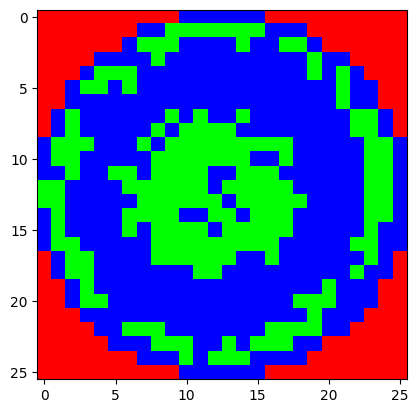

In [29]:
wanted_label = 'Donut'
loc_images_df = df[df['labels'] == wanted_label]

if not loc_images_df.empty:
    loc_image_data = loc_images_df.iloc[0]['images']
    # print(loc_image_data[0],type(loc_image_data[0]))
    # print("\n",loc_image_data[1],type(loc_image_data[1]))
    # print("\n",loc_image_data[2],type(loc_image_data[2]))

    plt.imshow(np.transpose(loc_image_data, (1, 2, 0)))
    plt.show()

Now let's put this image in our model to see what it would predict.

In [31]:
transposed_loc_image_data = np.transpose(loc_image_data, (1, 2, 0))
#print(transposed_loc_image_data)

#print("\n\nTraining dataset:\n", x_train)

print(transposed_loc_image_data in x_train)

True


The "Donut" image is even in the training dataset. Let's see if the model can guess right.

In [34]:

test_image_batch = np.expand_dims(transposed_loc_image_data, axis=0)

predictions = model.predict(test_image_batch)

predicted_class_index = np.argmax(predictions, axis=1)

predicted_class_label = label_encoder.inverse_transform(predicted_class_index)    #re transpose back

predicted_probability = np.max(predictions, axis=1)

print(f"The model predicts {predicted_class_label[0]} with a probability of {predicted_probability[0]}")


1/1 [==============================] - 0s 109ms/step
The model predicts Edge-Loc with a probability of 0.8830438852310181


Our model is terrible for "Donut", but it was obvious because there was only one "Donut" image to train.

What about categories that have more (or way more) occurences ?

Let's try for "Loc" (297 occurences), "Center" (90) and "Edge-Ring" (31).

First let's see how the labels are encoded:

In [95]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

for label, encoded_label in label_mapping.items():
    print(f"{label}: {encoded_label}")

L = np.array([0, 0, 0, 0, 1, 0, 0, 0, 0])

# for k in range(1000):         #determination of an image "Loc"
#     if np.array_equal(y_test[k], L):
#         print(k)

# 233
# 297
# 376
# 377

x_test[233]

test_image_batch = np.expand_dims(x_test[233], axis=0)

predictions = model.predict(test_image_batch)

predicted_class_index = np.argmax(predictions, axis=1)

predicted_class_label = label_encoder.inverse_transform(predicted_class_index)    #re transpose back

predicted_probability = np.max(predictions, axis=1)

print(f"The model predicts {predicted_class_label[0]} with a probability of {predicted_probability[0]}")

Center: 0
Donut: 1
Edge-Loc: 2
Edge-Ring: 3
Loc: 4
Near-full: 5
Random: 6
Scratch: 7
none: 8
1/1 [==============================] - 0s 50ms/step
The model predicts Edge-Loc with a probability of 0.7736133337020874


The model predicted wrong but still it is a Loc default. Let's try with "Center".

In [98]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

for label, encoded_label in label_mapping.items():
    print(f"{label}: {encoded_label}")

L = np.array([1, 0, 0, 0, 0, 0, 0, 0, 0])

# for k in range(1000):         #determination of an image "Center"
#     if np.array_equal(y_test[k], L):
#         print(k)

# 4
# 346
# 945

x_test[346]

test_image_batch = np.expand_dims(x_test[346], axis=0)

predictions = model.predict(test_image_batch)

predicted_class_index = np.argmax(predictions, axis=1)

predicted_class_label = label_encoder.inverse_transform(predicted_class_index)    #re transpose back

predicted_probability = np.max(predictions, axis=1)

print(f"The model predicts {predicted_class_label[0]} with a probability of {predicted_probability[0]}")

Center: 0
Donut: 1
Edge-Loc: 2
Edge-Ring: 3
Loc: 4
Near-full: 5
Random: 6
Scratch: 7
none: 8
1/1 [==============================] - 0s 264ms/step
The model predicts none with a probability of 0.6262046098709106


It doesn't work well with "Center" either, we should increase the number of default images to increase accuracy.

Let's try to change the parameters of our CNN.

What can we change ?
- the loss function
- the CNN structure
- the activation
- the optimizer
- the dropout
- the epochs
- the batch size


In [99]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model2 = Sequential()

model2.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(26, 26, 3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dropout(0.35))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model2.summary()

model2.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

score2 = model2.evaluate(x_test, y_test)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 24, 24, 32)        896       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 12, 12, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 1, 1, 128)        

By reducing the dropout from 50 to 35%, we have obtained a slightly better accuracy but it may not be significant.
On this training, the accuracy of the epoch 9/10 is better than the one of the epoch 10/10, so increase the number of epochs shouldn't be very relevant.

Let's try to change the optimizer, we will take RMSprop

In [101]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model3 = Sequential()

model3.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(26, 26, 3)))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten())
model3.add(Dropout(0.35))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(num_classes, activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])    # new optimizer


model3.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

score3 = model3.evaluate(x_test, y_test)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

Epoch 1/10
405/405 [==============================] - 15s 32ms/step - loss: 0.2940 - accuracy: 0.9414 - val_loss: 0.2191 - val_accuracy: 0.9464
Epoch 2/10
405/405 [==============================] - 13s 31ms/step - loss: 0.2077 - accuracy: 0.9499 - val_loss: 0.1923 - val_accuracy: 0.9513
Epoch 3/10
405/405 [==============================] - 13s 33ms/step - loss: 0.1794 - accuracy: 0.9544 - val_loss: 0.1750 - val_accuracy: 0.9548
Epoch 4/10
405/405 [==============================] - 14s 34ms/step - loss: 0.1625 - accuracy: 0.9590 - val_loss: 0.1761 - val_accuracy: 0.9589
Epoch 5/10
405/405 [==============================] - 13s 33ms/step - loss: 0.1491 - accuracy: 0.9608 - val_loss: 0.1676 - val_accuracy: 0.9596
Epoch 6/10
405/405 [==============================] - 13s 33ms/step - loss: 0.1369 - accuracy: 0.9649 - val_loss: 0.1786 - val_accuracy: 0.9492
Epoch 7/10
405/405 [==============================] - 13s 33ms/step - loss: 0.1231 - accuracy: 0.9660 - val_loss: 0.1767 - val_accuracy:

The accuracy we got is pretty much the same as the last model but the optimizer 'RMSprop' seems also interesting to use.

The parameters we still have not changed are :

- the loss function
- the CNN structure
- the activation
- the batch size

For this classification problem, the loss function we used ('categorical_crossentropy') is usally the best choice.
ReLu functions are also a pretty good solution, we could change our CNN structure and maybe add layers, but we would risk overfitting.
Let's try changing the batch size.

In [102]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model4 = Sequential()

model4.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(26, 26, 3)))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Flatten())
model4.add(Dropout(0.35))
model4.add(Dense(128, activation='relu'))
model4.add(Dense(num_classes, activation='softmax'))
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model4.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))    # batch size from 32 to 64

score4 = model4.evaluate(x_test, y_test)
print('Test loss:', score4[0])
print('Test accuracy:', score4[1])

Epoch 1/10
203/203 [==============================] - 14s 60ms/step - loss: 0.3414 - accuracy: 0.9360 - val_loss: 0.2364 - val_accuracy: 0.9450
Epoch 2/10
203/203 [==============================] - 12s 58ms/step - loss: 0.2241 - accuracy: 0.9474 - val_loss: 0.2099 - val_accuracy: 0.9436
Epoch 3/10
203/203 [==============================] - 11s 56ms/step - loss: 0.1875 - accuracy: 0.9527 - val_loss: 0.1774 - val_accuracy: 0.9562
Epoch 4/10
203/203 [==============================] - 12s 57ms/step - loss: 0.1734 - accuracy: 0.9552 - val_loss: 0.1706 - val_accuracy: 0.9541
Epoch 5/10
203/203 [==============================] - 12s 59ms/step - loss: 0.1627 - accuracy: 0.9592 - val_loss: 0.1730 - val_accuracy: 0.9548
Epoch 6/10
203/203 [==============================] - 12s 58ms/step - loss: 0.1523 - accuracy: 0.9627 - val_loss: 0.1626 - val_accuracy: 0.9555
Epoch 7/10
203/203 [==============================] - 12s 60ms/step - loss: 0.1403 - accuracy: 0.9630 - val_loss: 0.1691 - val_accuracy:

Changing the batch size seem to have improved the accuracy, the accuracy has nearly increased at every epoch, so maybe we could add a few epochs to the training.

We finally obtained an accuracy of 96.5%, it is pretty satisfying, but some more fine parameters could still be changed to make progress, such as :
- the CNN structure
- the activation